In [49]:
%matplotlib inline

import pandas as pd
from multiprocessing import Pool
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

def normCount(dataframe):
    dataframe['count'] = np.true_divide(dataframe['count'], np.sum(dataframe['count']))
    return dataframe

In [50]:
data_path = '/stor/work/Lambowitz/cdw2854/jurkatCells/mismatch_table'
data_files = glob(data_path + '/*tsv')
dfs = Pool(12).map(pd.read_table, data_files)
df = pd.concat(dfs, axis = 0)

In [51]:
gdf = df \
    .groupby(['samplename','mismatch','new_ref','read'])\
    .agg({'count':np.sum})\
    .reset_index()\
    .groupby(['samplename'])\
    .apply(normCount)\
    .pipe(lambda d: d[(d['new_ref']!=d['read']) & (d['read']!='N')]) 

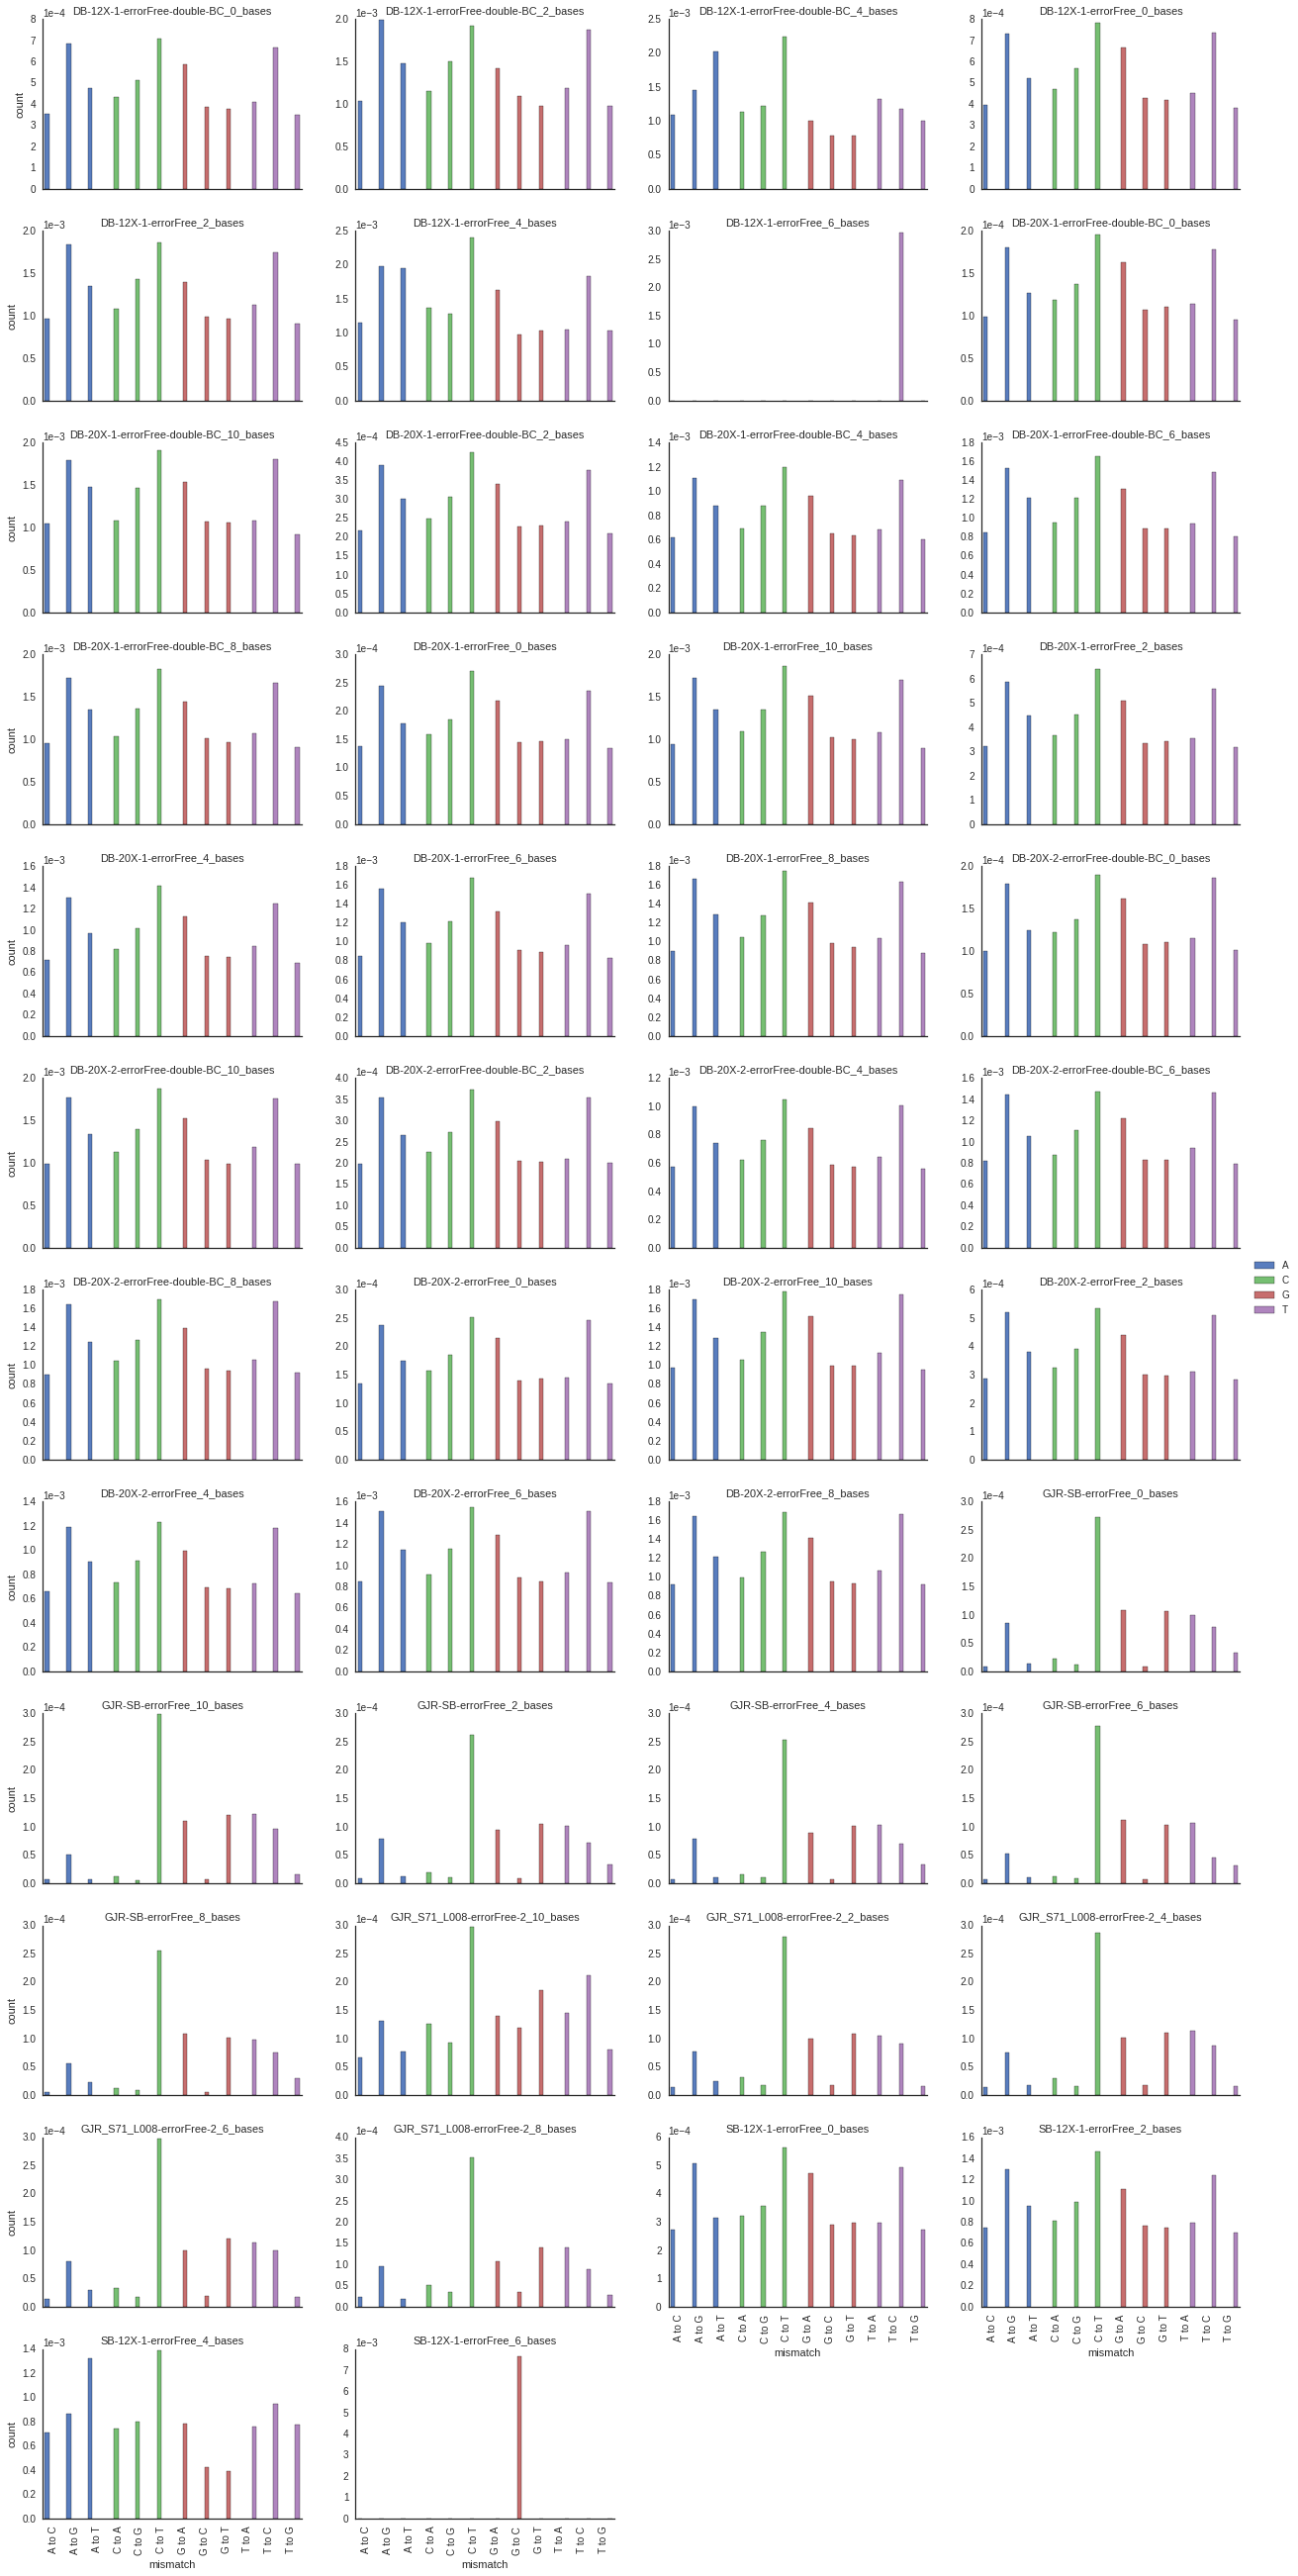

In [52]:
sns.set_style('white')
sns.plotting_context('paper',font_scale=1.2)
p = sns.FacetGrid(data= gdf, col='samplename', col_wrap=4,
                  aspect = 1.5,
                 sharey=False)
p.map(sns.barplot, 'mismatch','count','new_ref',palette=sns.color_palette("muted"))
p.set_titles('{col_name}')
p.add_legend()
lab=[ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) for ax in p.fig.axes]
p.set_xticklabels(rotation=80)